<a href="https://colab.research.google.com/github/sarmi2325/Supervised_Learning/blob/main/Polynomial_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
#Importing Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Loading the dataset
df=pd.read_csv('hw_200.csv')
df.head()




,Index,"Height(Inches)""","""Weight(Pounds)"""
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


In [69]:
#decribing the data
df.describe()

,Index,"Height(Inches)""","""Weight(Pounds)"""
count,200.000000,200.000000,200.000000
mean,100.500000,67.949800,127.221950
std,57.879185,1.940363,11.960959
min,1.000000,63.430000,97.900000
25%,50.750000,66.522500,119.895000
50%,100.500000,67.935000,127.875000
75%,150.250000,69.202500,136.097500
max,200.000000,73.900000,158.960000


In [72]:
def poly(degree,x):
  return np.vstack([x**i for i in range(degree+1)]).T

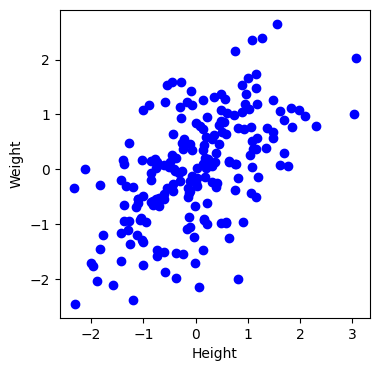

In [163]:
# Clean up column names
df.columns = df.columns.str.strip().str.replace('"', '')
#initializing the feature and target
X = df['Height(Inches)']
y = df['Weight(Pounds)']

#Normalizing the data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

x = poly(3,X)


n = x.shape[0]
#visualization of the dataset
plt.figure(figsize=(4,4))
plt.scatter(X,y,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [173]:
#Initializing the hyperparameters
# there is not bias because w0 act as a bias (1)
lr=0.01
epoch=1000
la = 0.01
w=np.zeros(x.shape[1])
#Training the model
for e in range(epoch):
  dy= x@w
  loss = (1/n)*sum(np.power(dy-y,2))
  dw = (2/n)*x.T@(dy-y) + 2 * la * w
  #updating the weight
  w = w-lr*dw


  if e%500==0:
    print(f"epoch : {e} loss : {loss} w:{w} ")


epoch : 0 loss : 0.994999999999999 w:[1.38777878e-17 1.10816082e-02 8.71746083e-04 3.21424427e-02] 
epoch : 500 loss : 0.6848162426583193 w:[ 0.03499749  0.53455498 -0.03578308  0.00643173] 


In [174]:
#mse (which penalizes outliers heavily)
mse = (1/n) * np.sum((dy - y) ** 2)

#rmse (same as mse, output unit is same as the target)
rmse= np.sqrt(mse)

#mae (used where outliers are not considered as much problems)
mae = (1/n)*np.sum(np.abs(dy-y))

#R2 (used to find the variance of the data,the best fit line covered)
ss_res = np.sum((y - dy) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

MSE  : 0.6846
RMSE : 0.8274
MAE  : 0.6455
R²   : 0.3119


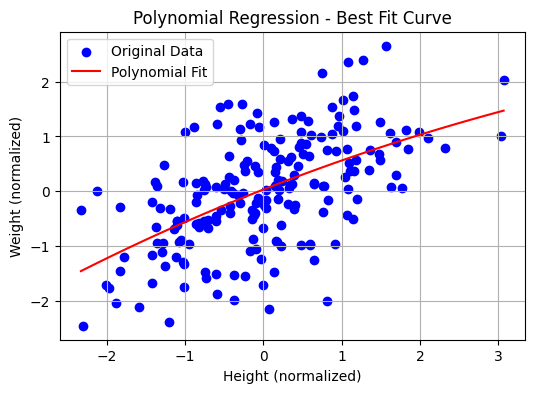

In [166]:

# Original x and y (already normalized)
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label='Original Data')

# Create a smooth curve range (normalized range)
x_range = np.linspace(X.min(), X.max(), 100)

# Polynomial transform for the curve (degree must match training)
x_range_poly = poly(3, x_range)

#Predict y using your learned weights
y_pred = x_range_poly @ w  # vectorized prediction

# Plot best-fit curve
plt.plot(x_range, y_pred, color='red', label='Polynomial Fit')

plt.xlabel("Height (normalized)")
plt.ylabel("Weight (normalized)")
plt.title("Polynomial Regression - Best Fit Curve")
plt.legend()
plt.grid(True)
plt.show()

